<a href="https://colab.research.google.com/github/guimontico/DataSicenceProjects/blob/master/UdacityProjects/StackOverflowSurvey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
!git init

Initialized empty Git repository in /content/.git/


In [0]:
#Insights based on survey 
#- Stack Overflow Survey is the most important survey related to development area, so we can find insights as growing technologies, salary diferences and more insights based on questions!

In [0]:
#QUESTIONS

#what most influences career satisfaction?
#What do the people who earn the most salaries have in common among the respondents?(between education, yearcoding and orgSize)
#what is needed to enter in a company and the probability?(predicting)

###1ºQuestion - #what most influences career satisfaction? (Falta Fazer)

In [0]:
total = Stack.isnull().sum().sort_values(ascending = False)
percent = (Stack.isnull().sum()/Stack.isnull().count()*100).sort_values(ascending = False)
tmp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
tmp

,Total,Percent
BlockchainOrg,40708,45.799534
CodeRevHrs,39093,43.982539
ConvertedComp,33060,37.194964
CompTotal,32938,37.057705
MiscTechWorkedWith,29297,32.961309
...,...,...
MainBranch,552,0.621041
Country,132,0.148510
OpenSourcer,0,0.000000
Hobbyist,0,0.000000


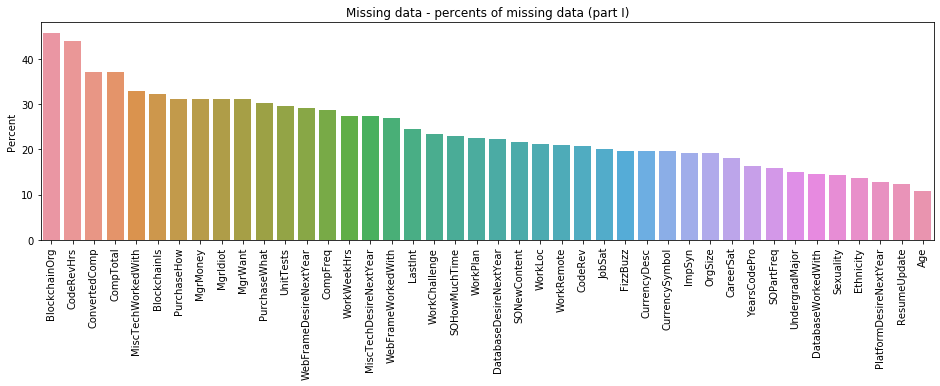

In [0]:
#making a function to plot the missing data
def plot_missing_data(start, end, text):
    tmp1 = tmp[start:end]
    plt.figure(figsize = (16,4))
    plt.title('Missing data - percents of missing data (part %s)' % text)
    s = sns.barplot(x=tmp1.index,y=tmp1['Percent'])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()    
    

plot_missing_data(0,42,"I")

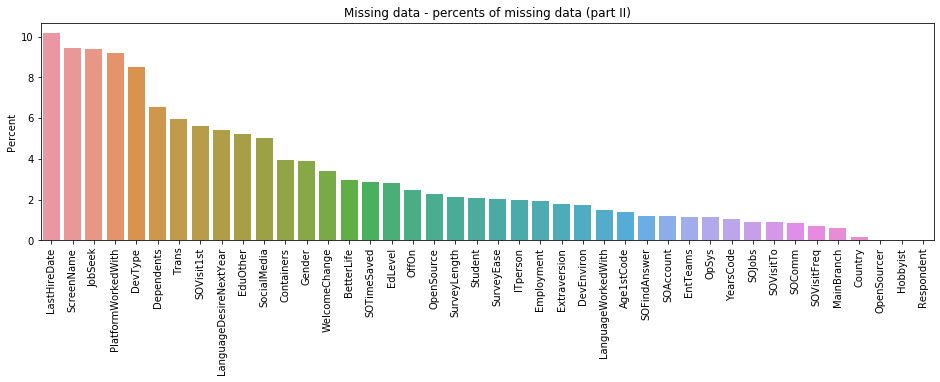

In [0]:
plot_missing_data(43,85,"II")

In [0]:
#Here we can see that a big amount of person don't answered about blockchain, being
#~40% about what their companies think about blockchain and ~30% about what they think the technology is.

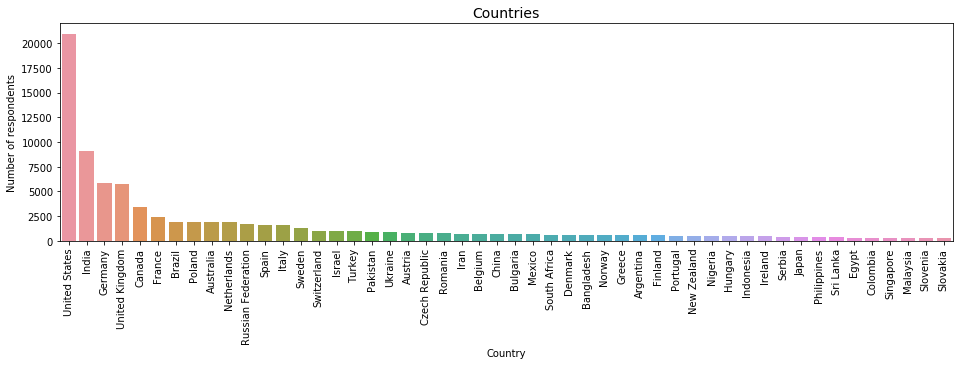

In [0]:
#making a function to plot the response for each question using seaborn library
def plot_stats(feature, text, size=2):
    temp = Stack[feature].dropna().value_counts().head(50)
    df1 = pd.DataFrame({feature: temp.index,'Number of respondents': temp.values})
    plt.figure(figsize = (8*size,4))
    plt.title(text,fontsize=14)
    s = sns.barplot(x=feature,y='Number of respondents',data=df1)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()   
    
 #plotting the countries of respondents 
plot_stats('Country','Countries')

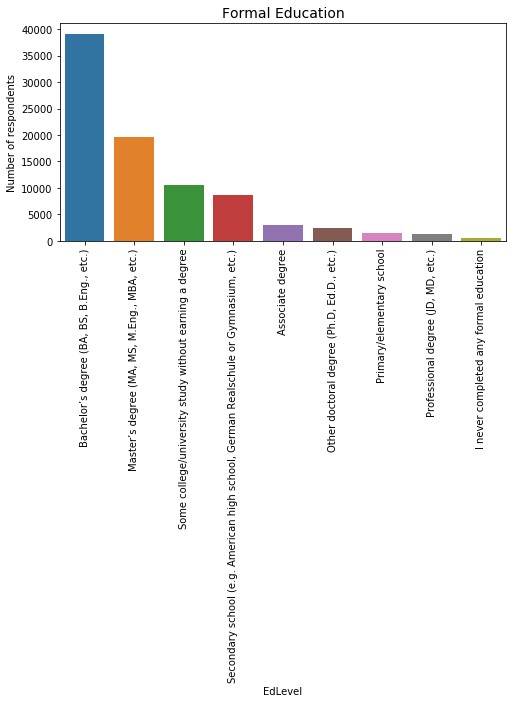

In [0]:
#plotting the education Level
plot_stats('EdLevel','Formal Education',1)

In [0]:
#most of respondets have a Bachelor's degree but almost evereyone had a education in the field

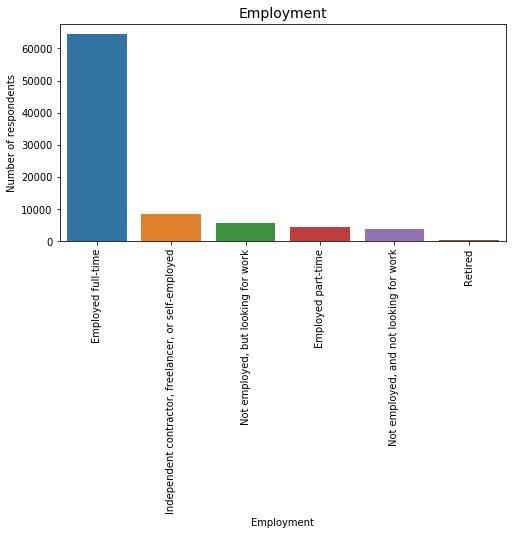

In [0]:
plot_stats('Employment', 'Employment',1)

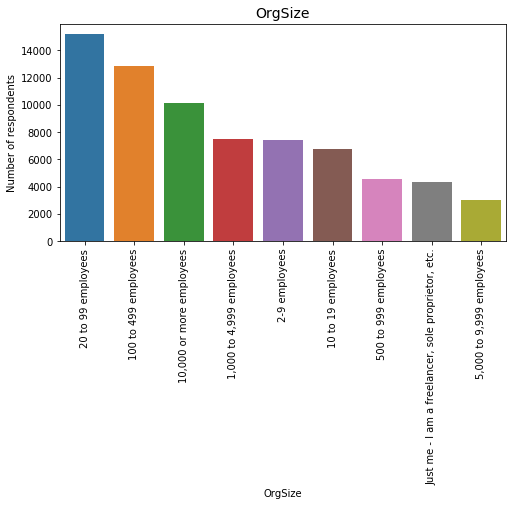

In [0]:
#e desses verificar o tamanho da empresa (OrgSize)
plot_stats('OrgSize', 'OrgSize',1)

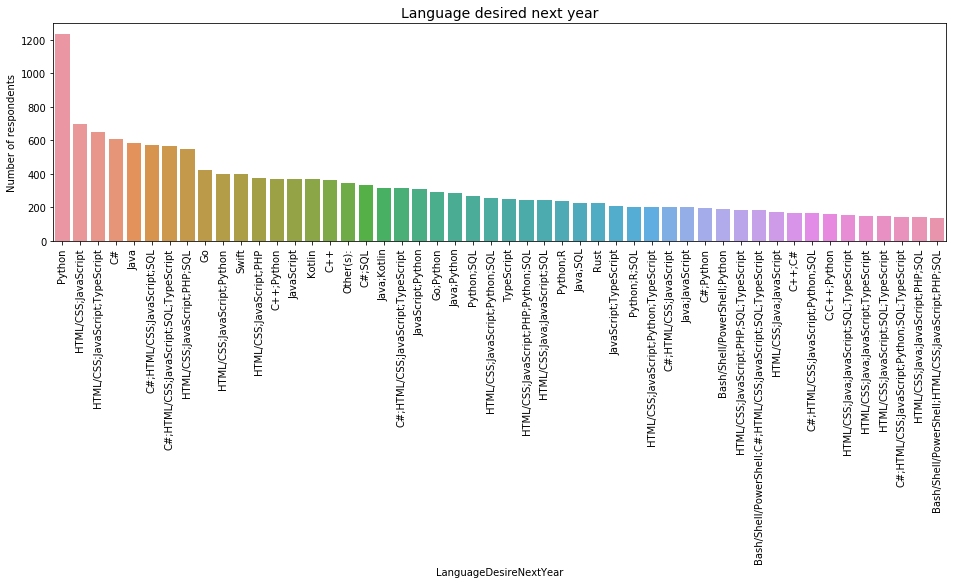

In [0]:
plot_stats('LanguageDesireNextYear','Language desired next year',2)

In [0]:
#here we sow that the freelancers work less than who work in a company
Stack.groupby('OrgSize').mean()['WorkWeekHrs'].sort_values(ascending=True)

OrgSize
Just me - I am a freelancer, sole proprietor, etc.    39.804857
5,000 to 9,999 employees                              41.394480
2-9 employees                                         41.891389
10 to 19 employees                                    41.965610
100 to 499 employees                                  42.008382
500 to 999 employees                                  42.052999
20 to 99 employees                                    42.570876
10,000 or more employees                              42.636478
1,000 to 4,999 employees                              42.939299
Name: WorkWeekHrs, dtype: float64

In [0]:
Stack.CompTotal.round(5)
Stack.groupby('OrgSize').mean().ConvertedComp.sort_values(ascending=False)

OrgSize
10,000 or more employees                              175389.058928
5,000 to 9,999 employees                              157500.936252
1,000 to 4,999 employees                              143154.719254
500 to 999 employees                                  128330.767649
100 to 499 employees                                  127505.799209
Just me - I am a freelancer, sole proprietor, etc.    113136.930323
20 to 99 employees                                    113087.820770
2-9 employees                                          96194.104392
10 to 19 employees                                     93326.648099
Name: ConvertedComp, dtype: float64

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [0]:
# selecting rows
pd.set_option('max_colwidth', 400)
Schema[Schema['Column'].str.contains(pat = 'WorkPlan') ] 

,Column,QuestionText
33,WorkPlan,How structured or planned is your work?


###2º question- What do the people who earn the most salaries have in common among the respondents?(education, orgSize) - Falta adicionar os comentários



In [0]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter("ignore", UserWarning)

In [0]:
Stack = pd.read_csv('/content/drive/My Drive/Data Science Udacity/stackoverflow_dataset/survey_results_public.csv')
Schema = pd.read_csv('/content/drive/My Drive/Data Science Udacity/stackoverflow_dataset/survey_results_schema.csv')

In [0]:
print("Stack Overflow 2019 Survey -  rows:", Stack.shape[0]," columns:", Stack.shape[1])
print("Stack Overflow 2019 Survey Schema -  rows:", Schema.shape[0]," columns:", Schema.shape[1])

Stack Overflow 2019 Survey -  rows: 88883  columns: 85
Stack Overflow 2019 Survey Schema -  rows: 85  columns: 2


In [0]:
pd.set_option("display.max_columns", 15)
Stack.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,...,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,...,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,...,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,...,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,...,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,...,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [0]:
StackSalarybid = pd.DataFrame()
StackSalarybid = Stack.groupby('OrgSize').mean().ConvertedComp.sort_values(ascending=False).to_frame(name = 'Salary').reset_index()
StackSalarybid

,OrgSize,Salary
0,"10,000 or more employees",175389.058928
1,"5,000 to 9,999 employees",157500.936252
2,"1,000 to 4,999 employees",143154.719254
3,500 to 999 employees,128330.767649
4,100 to 499 employees,127505.799209
5,"Just me - I am a freelancer, sole proprietor, ...",113136.930323
6,20 to 99 employees,113087.820770
7,2-9 employees,96194.104392
8,10 to 19 employees,93326.648099


In [0]:
StackSalarybid.loc[[5],"OrgSize"] = 'Freelancer'

In [0]:
StackSalarybid = StackSalarybid.round(2)
StackSalarybid

,OrgSize,Salary
0,"10,000 or more employees",175389.06
1,"5,000 to 9,999 employees",157500.94
2,"1,000 to 4,999 employees",143154.72
3,500 to 999 employees,128330.77
4,100 to 499 employees,127505.80
5,Freelancer,113136.93
6,20 to 99 employees,113087.82
7,2-9 employees,96194.10
8,10 to 19 employees,93326.65


In [0]:
Stack.ConvertedComp = Stack.ConvertedComp.round(2)

In [0]:
 StackEdBid = Stack.groupby('EdLevel').mean().ConvertedComp.sort_values(ascending=False).to_frame(name = 'Salary').reset_index()
 StackEdBid = StackEdBid.round(2)

In [0]:
StackEdBid

,EdLevel,Salary
0,"Other doctoral degree (Ph.D, Ed.D., etc.)",171504.38
1,I never completed any formal education,154087.31
2,Associate degree,146191.28
3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",134966.13
4,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",120712.39
5,Some college/university study without earning ...,117587.73
6,Primary/elementary school,95072.55
7,"Professional degree (JD, MD, etc.)",86490.19
8,"Secondary school (e.g. American high school, G...",85330.02


In [0]:
EdLevelCounts = pd.DataFrame()
EdLevelCounts = Stack['EdLevel'].value_counts().sort_values(ascending=False).to_frame(name = 'count').reset_index()
EdLevelCounts.columns = ['EdLevel','respondents']
EdLevelCounts


,EdLevel,respondents
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",39134
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",19569
2,Some college/university study without earning ...,10502
3,"Secondary school (e.g. American high school, G...",8642
4,Associate degree,2938
5,"Other doctoral degree (Ph.D, Ed.D., etc.)",2432
6,Primary/elementary school,1422
7,"Professional degree (JD, MD, etc.)",1198
8,I never completed any formal education,553


In [0]:
EdLevelCounts = EdLevelCounts.reindex(sorted(EdLevelCounts.columns), axis=1)
StackEdBid = StackEdBid.reindex(sorted(StackEdBid.columns), axis=1)

In [0]:
result = pd.merge(EdLevelCounts, StackEdBid, how='left')
result

,EdLevel,respondents,Salary
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",39134,134966.13
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",19569,120712.39
2,Some college/university study without earning ...,10502,117587.73
3,"Secondary school (e.g. American high school, G...",8642,85330.02
4,Associate degree,2938,146191.28
5,"Other doctoral degree (Ph.D, Ed.D., etc.)",2432,171504.38
6,Primary/elementary school,1422,95072.55
7,"Professional degree (JD, MD, etc.)",1198,86490.19
8,I never completed any formal education,553,154087.31


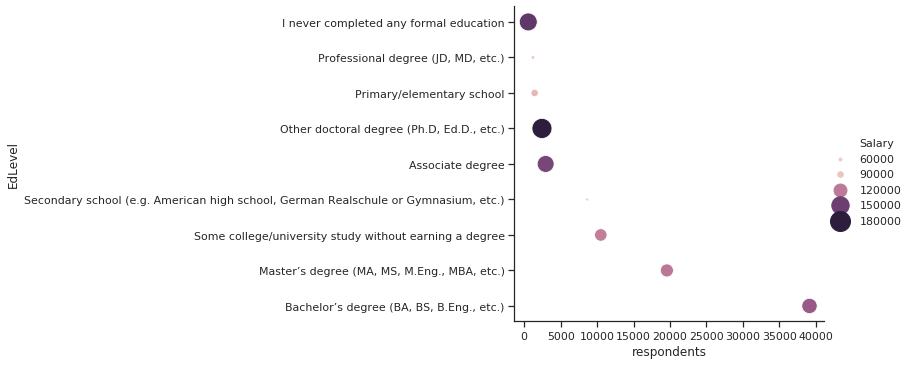

In [0]:
sns.relplot(x="respondents", 
            y="EdLevel", 
            hue="Salary", 
            data=result, 
            size="Salary", 
            sizes=(10, 400));

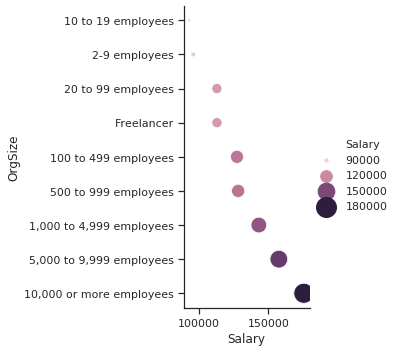

In [0]:
sns.relplot(x="Salary", 
            y="OrgSize", 
            hue="Salary", 
            data=StackSalarybid, 
            size="Salary",
            sizes=(10, 400));

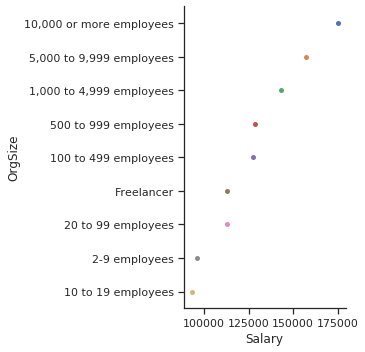

In [0]:
sns.catplot(x="Salary", y="OrgSize", kind="swarm",
            data=StackSalarybid.query("Salary != 3"));

### 3º Question: what is needed to enter in a company and the probability?(predicting)

In [0]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import pi
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier 
from string import ascii_letters
from collections import defaultdict, Counter
%matplotlib inline 
warnings.simplefilter("ignore", UserWarning)
pd.options.mode.use_inf_as_na = True
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_colwidth", 30)   

In [0]:
Stack = pd.read_csv('/content/drive/My Drive/Data Science Udacity/stackoverflow_dataset/survey_results_public.csv')
Schema = pd.read_csv('/content/drive/My Drive/Data Science Udacity/stackoverflow_dataset/survey_results_schema.csv')

In [0]:
Stack.dropna(subset = ["OrgSize"], inplace=True)
print(Stack.shape)

(71791, 85)


In [0]:
Stack['OrgSize'].isnull().sum()

0

In [0]:
#print(df2.head())
searchfor = ['hobby', 'longer']
Stack = Stack[~Stack.MainBranch.str.contains('|'.join(searchfor), na=False)]
print(Stack.MainBranch.value_counts())

I am a developer by profession                                                   62268
I am not primarily a developer, but I write code sometimes as part of my work     6847
Name: MainBranch, dtype: int64


In [0]:
df = Stack[['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'Employment', 'Student', 
            'EdLevel', 'UndergradMajor', 'EduOther', 'LastHireDate', 'LanguageWorkedWith', 
            'DatabaseWorkedWith', 'WebFrameWorkedWith', 'MiscTechWorkedWith', 'Age', 'Country', 'ConvertedComp', 'OrgSize']]

df = df.fillna(df.mode().iloc[0])


In [0]:
df2 = df.set_index('Respondent')['EduOther'].str.get_dummies(';')
df3 = df.set_index('Respondent')['LanguageWorkedWith'].str.get_dummies(';')
df4 = df.set_index('Respondent')['DatabaseWorkedWith'].str.get_dummies(';')
df5 = df.set_index('Respondent')['WebFrameWorkedWith'].str.get_dummies(';')
df6 = df.set_index('Respondent')['MiscTechWorkedWith'].str.get_dummies(';')
dfs = [df, df2, df3, df4, df5, df6]

In [0]:
import functools
df = df.set_index('Respondent')
df.head()

,MainBranch,Hobbyist,OpenSourcer,Employment,Student,EdLevel,UndergradMajor,EduOther,LastHireDate,LanguageWorkedWith,DatabaseWorkedWith,WebFrameWorkedWith,MiscTechWorkedWith,Age,Country,ConvertedComp,OrgSize
Respondent,,,,,,,,,,,,,,,,,
3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or tool without taking a formal course",1-2 years ago,HTML/CSS,PostgreSQL,jQuery,Node.js,28.0,Thailand,8820.0,100 to 499 employees
4,I am a developer by profession,No,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,C;C++;C#;Python;SQL,MySQL;SQLite,jQuery,.NET,22.0,United States,61000.0,100 to 499 employees
5,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Django;Express;Flask;jQuery;React.js;Spring,Cordova;Node.js,30.0,Ukraine,2000000.0,"10,000 or more employees"
7,I am a developer by profession,No,Never,"Independent contractor, freelancer, or self-employed",No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, electrical, mechanical)","Taught yourself a new language, framework, or tool without taking a formal course",NA - I am an independent contractor or self employed,HTML/CSS;JavaScript,Microsoft SQL Server,React.js,Node.js,42.0,Ukraine,2000000.0,"Just me - I am a freelancer, sole proprietor, etc."
9,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",Taken an online course in programming or software development (e.g. a MOOC);Participated in a full-time developer training program or bootcamp;Taken a part-time in-person course in programming or ...,Less than a year ago,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,DynamoDB;PostgreSQL;SQLite,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,23.0,New Zealand,95179.0,10 to 19 employees


In [0]:
#df = df.set_index('Respondent')
df_final = functools.reduce(lambda left,right: pd.merge(left,right,on='Respondent'), dfs)
df_final.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,Employment,Student,EdLevel,UndergradMajor,EduOther,LastHireDate,...,Node.js,Other(s):_y,Pandas,Puppet,React Native,TensorFlow,Torch/PyTorch,Unity 3D,Unreal Engine,Xamarin
0,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or tool without taking a formal course",1-2 years ago,...,1,0,0,0,0,0,0,0,0,0
1,4,I am a developer by profession,No,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,...,0,0,0,0,0,0,0,0,0,0
2,5,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,...,1,0,0,0,0,0,0,0,0,0


In [0]:
df = df_final.set_index('Respondent')
df

,MainBranch,Hobbyist,OpenSourcer,Employment,Student,EdLevel,UndergradMajor,EduOther,LastHireDate,LanguageWorkedWith,...,Node.js,Other(s):_y,Pandas,Puppet,React Native,TensorFlow,Torch/PyTorch,Unity 3D,Unreal Engine,Xamarin
Respondent,,,,,,,,,,,,,,,,,,,,,
3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or tool without taking a formal course",1-2 years ago,HTML/CSS,...,1,0,0,0,0,0,0,0,0,0
4,I am a developer by profession,No,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,C;C++;C#;Python;SQL,...,0,0,0,0,0,0,0,0,0,0
5,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,...,1,0,0,0,0,0,0,0,0,0
7,I am a developer by profession,No,Never,"Independent contractor, freelancer, or self-employed",No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, electrical, mechanical)","Taught yourself a new language, framework, or tool without taking a formal course",NA - I am an independent contractor or self employed,HTML/CSS;JavaScript,...,1,0,0,0,0,0,0,0,0,0
9,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",Taken an online course in programming or software development (e.g. a MOOC);Participated in a full-time developer training program or bootcamp;Taken a part-time in-person course in programming or ...,Less than a year ago,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86012,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, electrical, mechanical)","Taught yourself a new language, framework, or tool without taking a formal course",Less than a year ago,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript,...,1,0,0,0,0,0,0,0,0,0
86806,I am a developer by profession,Yes,Once a month or more often,Employed part-time,"Yes, part-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Computer science, computer engineering, or software engineering",Contributed to open source software,Less than a year ago,C#;HTML/CSS;JavaScript;SQL,...,1,0,0,0,0,0,0,0,0,0
87739,I am a developer by profession,Yes,Less than once per year,Employed part-time,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or software engineering","Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software",Less than a year ago,C;C++;HTML/CSS;JavaScript;PHP;Python;SQL,...,0,0,0,0,0,1,0,0,0,0


In [0]:
df = df.merge(df2, left_index=True, right_index=True)
df.head()

,MainBranch,Hobbyist,OpenSourcer,Employment,Student,EdLevel,UndergradMajor,EduOther,LastHireDate,LanguageWorkedWith,...,Xamarin,Completed an industry certification program (e.g. MCPD)_y,Contributed to open source software_y,Participated in a full-time developer training program or bootcamp_y,Participated in a hackathon_y,"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)_y",Received on-the-job training in software development_y,Taken a part-time in-person course in programming or software development_y,Taken an online course in programming or software development (e.g. a MOOC)_y,"Taught yourself a new language, framework, or tool without taking a formal course_y"
Respondent,,,,,,,,,,,,,,,,,,,,,
3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or tool without taking a formal course",1-2 years ago,HTML/CSS,...,0,0,0,0,0,0,0,0,0,1
4,I am a developer by profession,No,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,C;C++;C#;Python;SQL,...,0,0,0,0,0,0,1,0,1,1
5,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,...,0,0,1,0,0,0,1,0,1,1
7,I am a developer by profession,No,Never,"Independent contractor, freelancer, or self-employed",No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, electrical, mechanical)","Taught yourself a new language, framework, or tool without taking a formal course",NA - I am an independent contractor or self employed,HTML/CSS;JavaScript,...,0,0,0,0,0,0,0,0,0,1
9,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",Taken an online course in programming or software development (e.g. a MOOC);Participated in a full-time developer training program or bootcamp;Taken a part-time in-person course in programming or ...,Less than a year ago,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,...,0,0,1,1,0,1,1,1,1,1


In [0]:
df.isnull().sum(axis = 0)

MainBranch                                                                             0
Hobbyist                                                                               0
OpenSourcer                                                                            0
Employment                                                                             0
Student                                                                                0
                                                                                      ..
Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)_y     0
Received on-the-job training in software development_y                                 0
Taken a part-time in-person course in programming or software development_y            0
Taken an online course in programming or software development (e.g. a MOOC)_y          0
Taught yourself a new language, framework, or tool without taking a formal course_y    0
Length: 109, dtype: i

In [0]:
df.dtypes

MainBranch                                                                             object
Hobbyist                                                                               object
OpenSourcer                                                                            object
Employment                                                                             object
Student                                                                                object
                                                                                        ...  
Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)_y      int64
Received on-the-job training in software development_y                                  int64
Taken a part-time in-person course in programming or software development_y             int64
Taken an online course in programming or software development (e.g. a MOOC)_y           int64
Taught yourself a new language, framework, or tool without t

In [0]:
for column in df:
    if df[column].dtype == 'object':
       df[column] = df[column].astype("category")
df.dtypes

In [0]:
for column in df:
    if df[column].dtype != 'int64' and df[column].dtype != 'float64':
      print(df[column].dtype)
      df[column] = df[column].cat.codes
df.head()

In [0]:
df[df.columns[1:]].corr()['ConvertedComp'][:-1].sort_values()

In [0]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

In [0]:
X_train_original = df.drop(['ConvertedComp'], axis=1)
X_train_original.head()

,MainBranch,Hobbyist,OpenSourcer,Employment,Student,EdLevel,UndergradMajor,EduOther,LastHireDate,LanguageWorkedWith,...,Xamarin,Completed an industry certification program (e.g. MCPD)_y,Contributed to open source software_y,Participated in a full-time developer training program or bootcamp_y,Participated in a hackathon_y,"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)_y",Received on-the-job training in software development_y,Taken a part-time in-person course in programming or software development_y,Taken an online course in programming or software development (e.g. a MOOC)_y,"Taught yourself a new language, framework, or tool without taking a formal course_y"
Respondent,,,,,,,,,,,,,,,,,,,,,
3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or tool without taking a formal course",1-2 years ago,HTML/CSS,...,0,0,0,0,0,0,0,0,0,1
4,I am a developer by profession,No,Never,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,C;C++;C#;Python;SQL,...,0,0,0,0,0,0,1,0,1,1
5,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a...",Less than a year ago,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,...,0,0,1,0,0,0,1,0,1,1
7,I am a developer by profession,No,Never,"Independent contractor, freelancer, or self-employed",No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, electrical, mechanical)","Taught yourself a new language, framework, or tool without taking a formal course",NA - I am an independent contractor or self employed,HTML/CSS;JavaScript,...,0,0,0,0,0,0,0,0,0,1
9,I am a developer by profession,Yes,Once a month or more often,Employed full-time,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",Taken an online course in programming or software development (e.g. a MOOC);Participated in a full-time developer training program or bootcamp;Taken a part-time in-person course in programming or ...,Less than a year ago,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL;TypeScript;WebAssembly;Other(s):,...,0,0,1,1,0,1,1,1,1,1


In [0]:
y_train_original = Stack[['Respondent', 'ConvertedComp']].set_index('Respondent')
y_train_original.head()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train_original, y_train_original, test_size=0.30, random_state=42)

In [0]:
print(X_train.shape)
print( X_test.shape)
print(y_train.shape)
print(y_test.shape)

(48524, 108)
(20797, 108)
(48524, 1)
(20797, 1)


In [0]:
pd.value_counts(y_train_original.ConvertedComp, normalize = True)

In [0]:
pd.value_counts(X_train_original.MainBranch, normalize = True)

In [0]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn import metrics
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf=RandomForestClassifier(n_estimators=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: ignored

In [0]:
# selecting rows
pd.set_option('max_colwidth', 400)
Schema[Schema['Column'].str.contains(pat = 'MiscTechWorkedWith') ] 

,Column,QuestionText
51,MiscTechWorkedWith,"Which of the following other frameworks, libraries, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the technology and want to continue to do so, please check both boxes in that row.)"


In [0]:
Stack['EduOther'].head()

2                                                                                                                                                                                                                                                                                                                                  Taught yourself a new language, framework, or tool without taking a formal course
3                                                                                                                                                                                                 Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course
4                                                                                                                                                             Taken an online course in progra